<a href="https://colab.research.google.com/github/greatermonk/Sorting-Algorithms/blob/main/Sorting_Algorithms_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this session, we will be testing and visualizing various types of sorting algorithms to test which algorithm is suited for which task, and also analyze the complexity.





1.   Selection Sort
2.   Merge Sort
3.   Bubble Sort
4.   Quick Sort





***Selection sort:***

Selection sort works by finding the smallest element in the list and moving it to the front of the list. This process is repeated until the entire list is sorted. Selection sort is more efficient than bubble sort for large data sets, but it is still not as efficient as some other sorting algorithms.

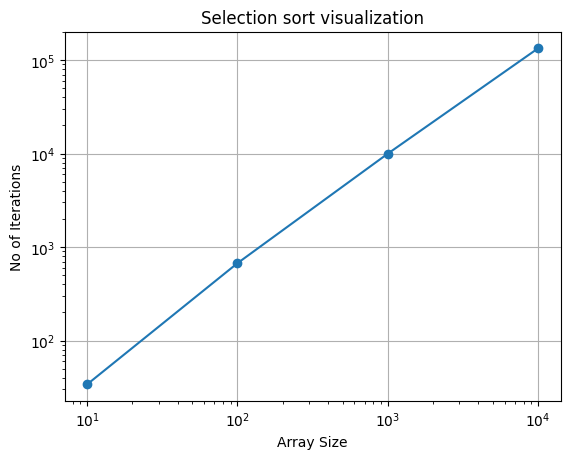

In [ ]:
class Sorting:
    def __init__(self, array: list[int]):
        self.array = array

    def selection_sort(self):
        """
        Sorts the given list using the selection sort algorithm.

        Returns:
            list: The sorted list.
        """
        arr = self.array.copy()  # Make a copy to avoid modifying the original array
        n = len(arr)

        iterations = []  # To store iteration count
        array_sizes = []  # To store array size for each iteration

        # Iterate over the list
        for i in range(n):
            # Find the index of the minimum element in the unsorted part
            min_idx = i
            for j in range(i + 1, n):
                if arr[j] < arr[min_idx]:
                    min_idx = j

            # Swap the minimum element with the first element of the unsorted part
            arr[i], arr[min_idx] = arr[min_idx], arr[i]

            # Store iteration count and array size for plotting
            iterations.append(i + 1)
            array_sizes.append(len(arr))

        return array_sizes, iterations

array = Sorting([50, 10, 20, 30, 40, 50, 60, 12])

def run_sort_on_arrays(array_sizes):
    iteration_counts = []
    for size in array_sizes:
        # Generate array of specified size with random integers
        arr = [random.randint(1, 10000) for _ in range(size)]
        # Run merge sort on the array
        sorted_array, iterations = merge_sort(arr)
        iteration_counts.append(iterations)
    return iteration_counts



import random

    # Define array sizes
array_sizes = [10, 100, 1000, 10000]
    # Run merge sort on arrays of different sizes and get iteration counts
iteration_count = run_sort_on_arrays(array_sizes)


from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(array_sizes, iteration_count, marker='o', linestyle='-')

ax.set_title("Selection sort visualization")
ax.set_xlabel("Array Size")
ax.set_ylabel("No of Iterations")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()




*Here we can Observe from the above graph, how the Selection sort algortihm works by moving the smallest element in front of the list and then comparing it with every single element in the list:*

**SELECTION SORT COMPLEXITY**

**Best Case Time Complexity: O(n^2):- **

The best case time complexity of selection sort occurs when the array is already sorted. In this case, the algorithm still needs to scan the entire array for each iteration to find the minimum element, leading to a time complexity of O(n^2).

**Average Case Time Complexity: O(n^2):- **

In the average case, the algorithm needs to perform n-1 iterations, and for each iteration, it needs to scan the remaining unsorted part of the array to find the minimum element. The total number of comparisons required is (n-1) + (n-2) + ... + 2 + 1 = n(n-1)/2, which is O(n^2).


**Worst Case Time Complexity: O(n^2):-**

The worst case time complexity of selection sort is also O(n^2), which occurs when the array is in reverse order or in a completely unsorted state.



*In all cases, the time complexity of selection sort is O(n^2), making it inefficient for large datasets. However, it has the advantage of being an in-place sorting algorithm, meaning it requires only a constant amount of additional memory space, and it is useful for educational purposes due to its simplicity.*


# **CONCLUSION:-**

It's important to note that while selection sort has its applications, it is generally not recommended for sorting large data sets due to its inefficient time complexity compared to more advanced sorting algorithms like merge sort, quicksort, or other O(n log n) algorithms. However, its simplicity and in-place nature can make it a viable choice in certain scenarios, particularly when dealing with small data sets or when there are specific memory or learning constraints.

# MERGE SORT
Merge sort is one of the most efficient sorting algorithms. It works on the principle of Divide and Conquer based on the idea of breaking down a list into several sub-lists until each sublist consists of a single element and merging those sublists in a manner that results into a sorted list.



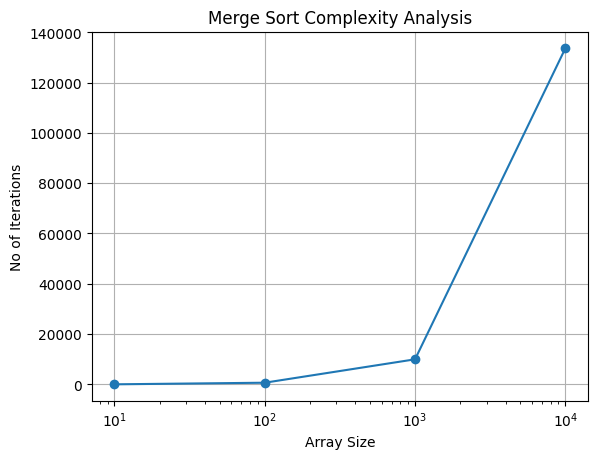

In [ ]:
import sys
sys.setrecursionlimit(10000)

def merge_sort(arr, iterations=0):
    if len(arr) <= 1:
        return arr, iterations

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half, iterations = merge_sort(left_half, iterations)
    right_half, iterations = merge_sort(right_half, iterations)

    return merge(left_half, right_half, iterations)


def merge(left, right, iterations):
    result = []
    left_index, right_index = 0, 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1
        iterations += 1

    while left_index < len(left):
        result.append(left[left_index])
        left_index += 1
        iterations += 1

    while right_index < len(right):
        result.append(right[right_index])
        right_index += 1
        iterations += 1

    return result, iterations


def run_merge_sort_on_arrays(array_sizes):
    iteration_counts = []
    for size in array_sizes:
        # Generate array of specified size with random integers
        arr = [random.randint(1, 10000) for _ in range(size)]
        # Run merge sort on the array
        sorted_array, iterations = merge_sort(arr)
        iteration_counts.append(iterations)
    return iteration_counts



import random

    # Define array sizes
my_array_size = [10, 100, 1000, 10000]
    # Run merge sort on arrays of different sizes and get iteration counts
iteration_counts = run_merge_sort_on_arrays(my_array_size)
    # Plot array size vs. iteration count
plt.plot(my_array_size, iteration_counts, marker='o', linestyle='-')
plt.title("Merge Sort Complexity Analysis")
plt.xlabel("Array Size")
plt.ylabel("No of Iterations")
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.grid(True)


**Merge Sort Complexity**:-

Time Complexity: O(N log(N)),  Merge Sort is a recursive algorithm and time complexity can be expressed as following recurrence relation.

*T(n) = 2T(n/2) + θ(n)\*

The above recurrence can be solved either using the Recurrence Tree method or the Master method. It falls in case II of the Master Method and the solution of the recurrence is θ(Nlog(N)). The time complexity of Merge Sort isθ(Nlog(N)) in all 3 cases (worst, average, and best) as merge sort always divides the array into two halves and takes linear time to merge two halves.

Auxiliary Space: O(N), In merge sort all elements are copied into an auxiliary array. So N auxiliary space is required for merge sort.

**Applications of Merge Sort**:-

1.Sorting large datasets: Merge sort is particularly well-suited for sorting large datasets due to its guaranteed worst-case time complexity of O(n log n).

2.External sorting: Merge sort is commonly used in external sorting, where the data to be sorted is too large to fit into memory.

3.Custom sorting: Merge sort can be adapted to handle different input distributions, such as partially sorted, nearly sorted, or completely

unsorted data.

**Advantages Of Merge Sort**:-

1)Stability: Merge sort is a stable sorting algorithm, which means it maintains the relative order of equal elements in the input array.

2)Guaranteed worst-case performance: Merge sort has a worst-case time complexity of O(N logN), which means it performs well even on large datasets.

3)Parallelizable: Merge sort is a naturally parallelizable algorithm, which means it can be easily parallelized to take advantage of multiple processors or threads




# BUBBLE SORT
Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in the wrong order. This algorithm is not suitable for large data sets as its average and worst-case time complexity is quite high.



**Bubble Sort Algorithm**:-

Traverse from left and compare adjacent elements and the higher one is placed at right side.

In this way, the largest element is moved to the rightmost end at first.

This process is then continued to find the second largest and place it and so on until the data is sorted.

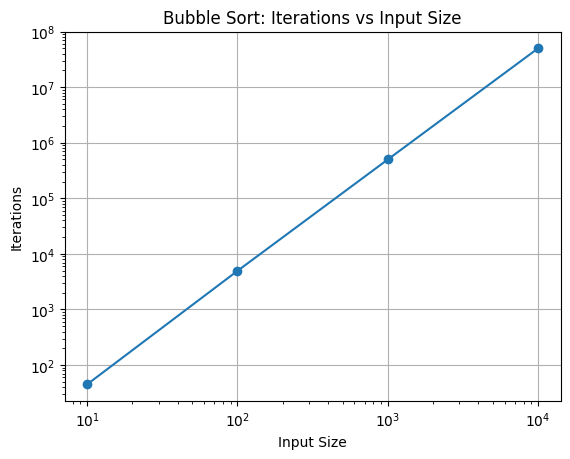

In [ ]:
import matplotlib.pyplot as plt
import random


class Sorting2:
  def __init__(self, array):
    self.array = array

  def bubble_sort(self):
        arr = self.array
        iterations = 0
        for i in range(len(arr)):
            for j in range(len(arr) - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
                iterations += 1
        return iterations

# Define a range of input sizes
input_sizes = [10, 100, 1000, 10000]

# Initialize lists to store input sizes and corresponding iterations
input_sizes_plot = []
iterations_plot = []

for size in input_sizes:
    # Generate a random array of the given size
    array = [random.randint(1, 10000) for _ in range(size)]

    # Create an instance of BubbleSort
    bubble_sort = Sorting2(array)

    # Apply bubble sort and get the number of iterations
    iterations = bubble_sort.bubble_sort()

    # Append input size and corresponding iterations to the lists
    input_sizes_plot.append(size)
    iterations_plot.append(iterations)

# Plotting
plt.plot(input_sizes_plot, iterations_plot, marker='o')
plt.title('Bubble Sort: Iterations vs Input Size')
plt.xlabel('Input Size')
plt.xscale('log')
plt.ylabel('Iterations')
plt.yscale('log')
#plt.yscale('log')
plt.grid(True)







**Time Complexity:** :-

The bubble sort algorithm has a time complexity of O(n^2) in the worst and average case scenarios. This is evident from the quadratic relationship between input size and iterations. As the input size increases, the number of iterations (and thus time taken) increases quadratically.

**Disadvantages of Bubble Sort:**:-

Bubble sort has a time complexity of O(N2) which makes it very slow for large data sets.

Bubble sort is a comparison-based sorting algorithm, which means that it requires a comparison operator to determine the relative order of elements in the input data set. It can limit the efficiency of the algorithm in certain cases.

**Where is the Bubble sort algorithm used?**

Due to its simplicity, bubble sort is often used to introduce the concept of a sorting algorithm. In computer graphics, it is popular for its capability to detect a tiny error (like a swap of just two elements) in almost-sorted arrays and fix it with just linear complexity (2n).

Example: It is used in a polygon filling algorithm, where bounding lines are sorted by their x coordinate at a specific scan line (a line parallel to the x-axis), and with incrementing y their order changes (two elements are swapped) only at intersections of two lines.

# QUICK SORT
QuickSort is a sorting algorithm based on the Divide and Conquer algorithm that picks an element as a pivot and partitions the given array around the picked pivot by placing the pivot in its correct position in the sorted array.

**How does QuickSort work?:-**

The key process in quickSort is a partition(). The target of partitions is to place the pivot (any element can be chosen to be a pivot) at its correct position in the sorted array and put all smaller elements to the left of the pivot, and all greater elements to the right of the pivot.

Partition is done recursively on each side of the pivot after the pivot is placed in its correct position and this finally sorts the array.

**Algorithm**:-

**Choose Pivot:** Select a pivot element from the array. There are various strategies for choosing the pivot, such as selecting the first, last, middle, or a random element.

**Partitioning:** Rearrange the elements of the array so that all elements less than the pivot come before it, and all elements greater than the pivot come after it. After this partitioning, the pivot is in its final sorted position.

**Recursion:** Recursively apply the above steps to the sub-arrays formed by partitioning until the base case is reached (typically when a sub-array has fewer than two elements).

**Combine:** No explicit combining step is needed, as the sorting is done in place through the partitioning process.


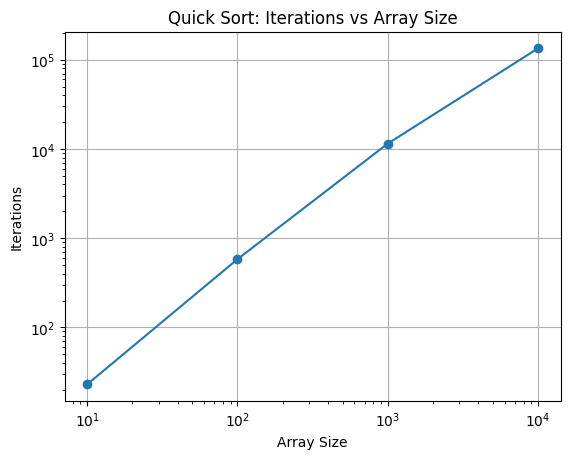

In [ ]:
import matplotlib.pyplot as plt
import random

def quick_sort(arr):
    # Quick sort with counting iterations
    if len(arr) <= 1:
        return arr, 0

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    _, left_iterations = quick_sort(left)
    _, right_iterations = quick_sort(right)

    return left + middle + right, len(left) + len(right) + left_iterations + right_iterations

# Function to generate arrays of varying sizes
def generate_arrays(sizes):
    arrays = []
    for size in sizes:
        arrays.append([random.randint(1, 10000) for _ in range(size)])
    return arrays

# Function to calculate iterations for each array size
def calculate_iterations(arrays):
    iterations = []
    for arr in arrays:
        _, iters = quick_sort(arr)
        iterations.append(iters)
    return iterations

# Define array sizes
sizes = [10, 100, 1000, 10000]

# Generate arrays of varying sizes
arrays = generate_arrays(sizes)

# Calculate iterations for each array size
iterations2 = calculate_iterations(arrays)

# Plotting
plt.plot(sizes, iterations2, marker='o')
plt.title('Quick Sort: Iterations vs Array Size')
plt.xlabel('Array Size')
plt.xscale('log')
plt.ylabel('Iterations')
plt.yscale('log')
plt.grid(True)







**Complexity Analysis Of Quick Sort:-**

Time Complexity:-

In the average case, Quick Sort has a time complexity of O(n log n). This is because the partitioning step divides the array into roughly equal halves, and each partitioning step takes linear time.

Space Complexity:-

Quick Sort has a space complexity of O(log n) in the best and average cases. This is because the algorithm typically uses recursion to sort sub-arrays. The maximum depth of the recursion tree is log n, where n is the number of elements in the array.

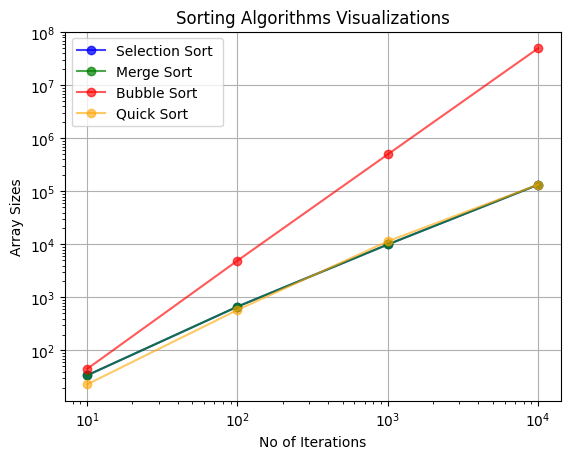

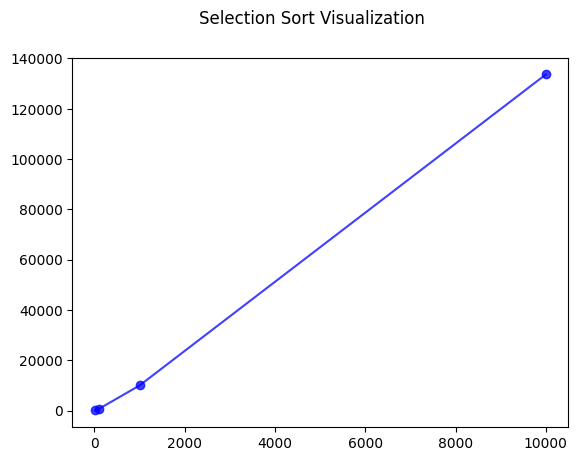

In [ ]:
my_array_size = [10, 100, 1000, 10000]
    # Run merge sort on arrays of different sizes and get iteration counts
iteration_counts = run_merge_sort_on_arrays(my_array_size)

Blle_sort = (input_sizes_plot, iterations_plot)
quicksort = (sizes, iterations2)
#array_sizes, iterations = array.selection_sort()
plt.title("Sorting Algorithms Visualizations")
plt.xlabel("No of Iterations")
plt.xscale('log')
plt.ylabel("Array Sizes")
plt.yscale('log')
plt.grid(True)
plt.minorticks_on()
plt.plot(array_sizes, iteration_count, label = "Selection Sort ", color = 'b', marker = 'o', alpha = 0.75)
plt.plot(my_array_size, iteration_counts, label = "Merge Sort", color = 'g', marker = 'o', alpha = 0.70)
plt.plot(input_sizes_plot, iterations_plot, label = "Bubble Sort", color = 'r', marker = 'o', alpha = 0.65)
plt.plot(sizes, iterations2, label = "Quick Sort", color = 'orange', marker = 'o', alpha = 0.60)
plt.legend()
plt.figure()
plt.subplot()
plt.suptitle("Selection Sort Visualization")
plt.plot(array_sizes, iteration_count, label = "Selection Sort ", color = 'b', marker = 'o', alpha = 0.75)

plt.show()








